<a href="https://colab.research.google.com/github/Vgrams05/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-08-06 16:38:47--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  39.0MB/s    in 4.8s    

2020-08-06 16:38:52 (40.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [7]:
##### YOUR CODE HERE #####

#we need from orders prior: order id, product id, and add to cart
import pandas as pd
order_products_prior= pd.read_csv('order_products__prior.csv')

order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
# we need from order train: order id, product id and add to cart
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
#we need from orders: order id, user id, order number, order dow, and order hour
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
# we need from products: product id and name
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
condition = (orders['order_id'] <= 10)
orders_subset = orders[condition]

print(orders_subset.shape)
orders_subset.head()


(10, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
50028,8,3107,prior,5,4,6,17.0
370620,6,22352,prior,4,1,12,30.0
1868044,1,112108,train,4,4,10,9.0
2249060,10,135442,prior,4,6,8,8.0
2308534,9,139016,prior,14,0,19,5.0


In [20]:
condition = ((orders['user_id'] == 1) & (orders['order_number'] <= 2))
orders_subset = orders [condition]

print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [21]:
order_products_subset = order_products[((order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795))]

print(order_products_subset.shape)
order_products_subset.head(11)

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [22]:
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')

orders_and_products.head(11)


,order_id,user_id_x,eval_set_x,order_number_x,order_dow_x,order_hour_of_day_x,days_since_prior_order_x,user_id_y,eval_set_y,order_number_y,order_dow_y,order_hour_of_day_y,days_since_prior_order_y
0,2539329,1,prior,1,2,8,NaN,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0,1,prior,2,3,7,15.0


In [23]:
orders_and_products = orders_and_products.drop(['eval_set_x', 'eval_set_y', 'days_since_prior_order_x', 'days_since_prior_order_y'], axis='columns')
orders_and_products.head(11)

,order_id,user_id_x,order_number_x,order_dow_x,order_hour_of_day_x,user_id_y,order_number_y,order_dow_y,order_hour_of_day_y
0,2539329,1,1,2,8,1,1,2,8
1,2398795,1,2,3,7,1,2,3,7


In [25]:
products['product_id']

0            1
1            2
2            3
3            4
4            5
         ...  
49683    49684
49684    49685
49685    49686
49686    49687
49687    49688
Name: product_id, Length: 49688, dtype: int64

In [26]:
products['product_id'].isin([196, 26088])

0        False
1        False
2        False
3        False
4        False
         ...  
49683    False
49684    False
49685    False
49686    False
49687    False
Name: product_id, Length: 49688, dtype: bool

In [28]:
condition = products['product_id']
products_subset = products[condition]

products_subset

KeyError: ignored

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table2 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    columns=['treatmenta', 'treatmentb'], 
    index=['John Smith', 'Jane Doe', 'Mary Johnson'])

table2 

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [62]:
table2 = table2.reset_index()
table2

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [64]:

idy = table2.melt(id_vars = 'index', value_vars=['treatmenta', 'treatmentb'])
idy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [67]:
tidy = idy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [68]:
tidy.trt = tidy.trt.str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [70]:
# tidy -> table2
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [57]:
flights = sns.load_dataset('flights')

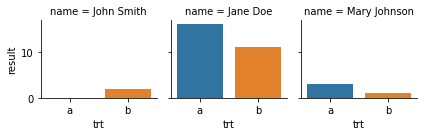

In [72]:
# Flights Pivot Table
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [73]:
##### YOUR CODE HERE #####
from IPython.display import display, Image
url = 'https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2'
example = Image(url=url, width=600)

display(example)

In [74]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [81]:
product_names = ['Ice Cream', 'Frozen Pizza']

In [82]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [83]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [84]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [85]:
merged = (products [['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge (orders[['order_id', 'order_hour_of_day']]))

merged.head(10)

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11
5,9434,Bag of Large Lemons,1107,11
6,12078,Shredded Mexican Blend Cheese,1107,11
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
9,24532,Cranberry Almond Chicken Salad,1107,11


In [87]:
condition = ((merged['product_name']=='Ice Cream') |
             (merged['product_name']=='Frozen Pizza'))
merged = merged [condition]

print (merged.shape)
merged.head()

(61, 4)


,product_id,product_name,order_id,order_hour_of_day
10596178,43856,Ice Cream,1597860,17
11234854,43856,Ice Cream,1102736,13
12377033,43856,Ice Cream,1765812,13
13092052,43856,Ice Cream,1662558,11
16599730,43856,Ice Cream,504616,3


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####